# Project 2: Investigation of dataset about "no-show" visits in Brazilian hospitals.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#qu1">Question1</a></li>
    <li><a href="#qu2">Question2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>


<a id='intro'></a>
## Introduction

In first section we will import all needed packages.

Then we will analyze data set to find out if there is any inaccuracy.

In the third section there will be place for codes helping us to understand relations between variables.

In this part we wil try to answer questions:

###### Which location has the biggest number of medical appointments on which patient didn't show up?

###### What characteristics of patient are associated with "no-show" visits?
<li> </li>

Last section is conclusion of the results that have been performed in previous sections and include limitations of analysis.

##### Importing packages for further use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from pyspark.sql.functions import *
import statsmodels.stats.proportion
from scipy import stats

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

##### Loading data and taking first observation about data type, range of data, missing data.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Checking if there are any null values

In [8]:
# null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Answer: there are no nulls

##### Checking if there are any duplicates

In [9]:
# duplicate values
df.duplicated().sum()

0

Answer: there are no duplicates

##### Checking unique values in columns

Checking number of different patients

In [19]:
# unique values PatientId
df['PatientId'].nunique()

62299

Checking number of different appointment day values

In [18]:
# unique values AppointmentDay
df['AppointmentDay'].nunique()

27

and unique values for 'AppointmentDay'

In [39]:
# unique values AppointmentDay
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Answer: all rows have the same time, so we will cut it off in the next section

Checking number of different scheduled day values

In [17]:
# unique values ScheduleDay
df['ScheduledDay'].nunique()

103549

and some values for 'ScheduledDay'

In [13]:
# unique values ScheduledDay - subset
df['ScheduledDay'].iloc[100:105]

100    2016-04-12T15:47:45Z
101    2016-04-29T17:24:19Z
102    2016-04-28T10:21:39Z
103    2016-04-29T09:01:27Z
104    2016-04-28T08:04:48Z
Name: ScheduledDay, dtype: object

Answer: to have similar data type in this column (like in AppointmentDay), 
we will cut time off and put to a new column in the next section

Checking number of different gender values

In [16]:
# unique values Gender
df['Gender'].nunique()

2

and unique values for 'Gender'


In [15]:
# unique values Gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

Answer: this column is correct

Checking number of different hospital localisations

In [51]:
# unique values Neighbourhood
df['Neighbourhood'].nunique()

81

Answer: this is too much to put them all on one chart. 
We will take percent of it and show localisations with biggest number of "no-show" visits in section Exploratory Data Analysis

Checking number of different scholarship flags

In [21]:
# unique values Scholarship
df['Scholarship'].nunique()

2

and unique values for 'Scholarship'

In [22]:
# unique values Scholarship
df['Scholarship'].unique()

array([0, 1], dtype=int64)

Answer: this column is correct

Checking number of different Hipertension flags


In [23]:
# unique values Hipertension
df['Hipertension'].nunique()

2

and unique values for 'Hipertension'

In [58]:
# unique values Hipertension
df['Hipertension'].unique()

array([1, 0], dtype=int64)

Answer: this column is correct

Checking number of different Diabetes flags

In [24]:
# unique values Diabetes
df['Diabetes'].nunique()

2

and unique values for 'Diabetes'

In [27]:
# unique values Diabetes
df['Diabetes'].unique()

array([0, 1], dtype=int64)

Answer: this column is correct

Checking number of different Alcoholism flags

In [28]:
# unique values Alcoholism
df['Alcoholism'].nunique()

2

and unique values for 'Alcoholism'

In [29]:
# unique values Alcoholism
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

Answer: this column is correct

Checking number of different Handcap flags

In [30]:
# unique values Handcap
df['Handcap'].nunique()

5

and unique values for 'Handcap'

In [31]:
# unique values Handcap
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

Answer: this column doesn't have 0/1 flag

To have similar data type in this column (like in other columns with flags),
we will change it into values 0 for 0 and 1 for 1,2,3,4 in the next section

Checking number of different SMS_received flags

In [33]:
# unique values SMS_received
df['SMS_received'].nunique()

2

and unique values for SMS_received

In [34]:
# unique values SMS_received
df['SMS_received'].unique()

array([0, 1], dtype=int64)

Answer: this column is correct

##### Checking data types in the data set

Checking data types

In [37]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checking some values for PatientId

In [41]:
# PatientId values - subset
df['PatientId'].iloc[105:110]

105    2.921558e+12
106    4.439514e+14
107    7.954396e+12
108    4.337498e+13
109    1.295988e+14
Name: PatientId, dtype: float64

Answer: column PateintId is saved as float, this is incorrect.

In the next section we will change it to integer type.

Checking simple metrics of data set

In [63]:
# statistics for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Checking number of rows with Age <0

In [43]:
# rows with Age <0
df.query('Age < 0')['PatientId'].value_counts()

4.659432e+14    1
Name: PatientId, dtype: int64

and values for row with Age <0

In [44]:
# rows with Age <0
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Answer: this row is incorrect, we will drop it in the next section

### Data Cleaning

As we can see in section 'General Properties', we need to work with columns: 'AppointmentDay', 'ScheduledDay', 'Handcap'.



In section 'Data Cleaning' we will:

###### -> cut off time from AppointmentDay

###### -> split ScheduledDay into date and time

###### -> drop rows that have Age < 0

###### -> create new column 'Handicap'

To prepare columns for further investigation, we will add new columns too. 

They will be named:

###### ->  new column 'Age_group' 

###### -> new column' Has_disease'


In [3]:
# copy of the data set
df_edt = df.copy()

Cutting off time from AppointmentDay

In [4]:
# AppointmentDay as date
df_edt['AppointmentDay'] = df_edt['AppointmentDay'].str.extract('(\d{4}-\d{2}-\d{2})').astype(dt.date)

Splitting ScheduledDay into date and time

In [5]:
# ScheduledDay as time
df_edt['ScheduledTime'] = df_edt['ScheduledDay'].apply(lambda x: x.split("T")[1]).astype(dt.time)

In [6]:
# ScheduledDay as date
df_edt['ScheduledDay'] = df_edt['ScheduledDay'].apply(lambda x: x.split("T")[0]).astype(dt.date)

In [52]:
# examples of data
df_edt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z


In [15]:
# min and max value for ScheduledDay
df_edt['ScheduledDay'].min(), df_edt['ScheduledDay'].max()

('2015-11-10', '2016-06-08')

Also, we need to drop rows with Age < 0

In [7]:
# cleaning rows wiht Age < 0
df_edt.drop(df.query('Age < 0').index, inplace=True)

Let's test if this helped.

In [55]:
# checking
df_edt.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime


Answer: it is ok, row was deleted.

##### Furthermore, we will add new column about age and disease.

Adding new column Age_group

This column will be used in the next section

In [8]:
# labels for age_groups

labels_age_group = pd.Series(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>90'])

# cutting data into bins
df_edt['Age_group'] = pd.cut(df_edt['Age'], bins=[-1,9,19,29,39,49,59,69,79,89,115], labels=labels_age_group)

# examples of data
df_edt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,Age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z,60-69
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z,50-59
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z,60-69
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z,0-9
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z,50-59


Adding column Has_disease

This column will be used in the next section

In [9]:
# aggregating data about illness
df_edt['Has_disease'] = df_edt[["Hipertension", "Diabetes", "Alcoholism", "Handcap"]].max(axis=1).replace({2:1,3:1,4:1})

# examples of data
df_edt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,Age_group,Has_disease
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z,60-69,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z,50-59,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z,60-69,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z,0-9,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z,50-59,1


Let's rename column 'No-show' to No_show. It will be more friendly, when we use it drawing charts 

In [10]:
# changing column name
df_edt.rename(columns={"No-show": "No_show"}, inplace=True)

# examples of data
df_edt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledTime,Age_group,Has_disease
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z,60-69,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z,50-59,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z,60-69,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z,0-9,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z,50-59,1


<a id='eda'></a>
## Exploratory Data Analysis


In this section we will try to answer two questions.

The first is general about 'No-show' visits and locations of hospitals. 

The second one is about patients characteristics.

<a id='qu1'></a>
### Which location has the biggest number of medical appointments on which patient didn't show up?

Let's see how many visits have flag 'No-show' equal to 'Yes',

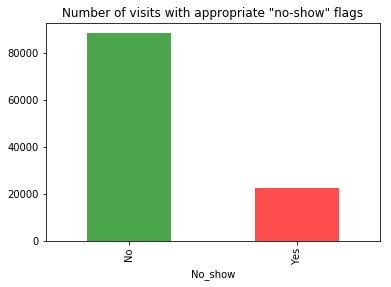

In [65]:
# graph title
title_ = 'Number of visits with appropriate "no-show" flags'

# graph colors
colors_ = ['green', 'red']

# drawing graph
df1 = df_edt.groupby("No_show")["AppointmentID"].count().plot(kind='bar',title=title_,color=colors_, alpha =0.7)

and what proportion it is in our data set.

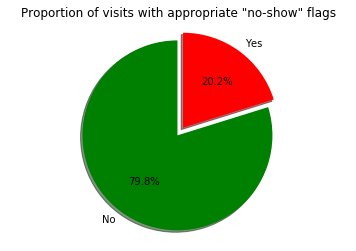

In [66]:
# number of total visits
total_visits = df_edt["AppointmentID"].count()

# graph labels
labels_ = ['No','Yes']

# graph slices
slice1 = df_edt.query('No_show == "No"')["AppointmentID"].count()/total_visits
slice2 = df_edt.query('No_show == "Yes"')["AppointmentID"].count()/total_visits

# graph sizes
sizes = [slice1, slice2]
# graph options
explode_ = (0, 0.1)
# graph colors
colors_ = ['green', 'red']

# drawing graph
fig1, ax1 = plt.subplots()
ax1.set_title('Proportion of visits with appropriate "no-show" flags')
ax1.pie(sizes, explode=explode_, labels=labels_, colors = colors_, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
# showing graph
plt.show()

Now we will create bar chart for 25% locations with largest number of "no-show" visits

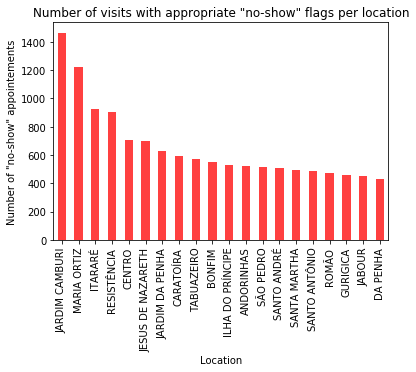

In [14]:
# graph title
title_2 = 'Number of visits with appropriate "no-show" flags per location'

# number of locations
df2 = df_edt.query('No_show == "Yes"').groupby("Neighbourhood")["AppointmentID"].count().sort_values(ascending=False)

# 25% of locations
number = df2.count()*0.25

# drawing graph with 25% locations
df2.head(int(number)).plot(kind='bar', color='red', title=title_2, alpha =0.75)

# graph labels
plt.xlabel('Location')
plt.ylabel('Number of "no-show" appointements');

<a id='qu2'></a>
### What characteristics of patient are associated with "no-show" visits?

Let's create chart with "no-show" visit proportion for each Age_group

In [68]:
# examples of values
df_edt[["Age_group", "No_show"]].head(10)

,Age_group,No_show
0,60-69,No
1,50-59,No
2,60-69,No
3,0-9,No
4,50-59,No
5,70-79,No
6,20-29,Yes
7,30-39,Yes
8,20-29,No
9,10-19,No


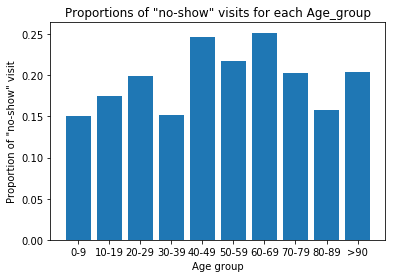

In [67]:
# names of bins with age_group
grp_list = df_edt["Age_group"].unique()

# no-show data subset
df_edt_no_show = df_edt.query('No_show== "Yes"')

# list for proportions of no-show visits
proportion_list = []

# counting proportions for each age_group
for x in grp_list:
    txt = 'Age_group == {}'.format(x)
    lba_total = df_edt[df_edt["Age_group"]=='{}'.format(x)]['AppointmentID'].count()
    lba_no_show = df_edt_no_show[df_edt_no_show["Age_group"]=='{}'.format(x)]['AppointmentID'].count()
    proportion_list.append(float(lba_no_show/lba_total))
    
    #print([x,lba_no_show/lba_total])

# bars localisations
locations = [1,2,3,4,5,6,7,8,9,10]

# drawing graph
plt.bar(locations, proportion_list, tick_label = grp_list.sort_values(ascending=True))
# graph title and labels
plt.title('Proportions of "no-show" visits for each Age_group')
plt.xlabel('Age group')
plt.ylabel('Proportion of "no-show" visit');

And now we will create chart for "no-show" visits and our new column 'Has_disease'

In [69]:
# examples of values
df_edt[["Has_disease", "No_show"]].head(10)

,Has_disease,No_show
0,1,No
1,0,No
2,0,No
3,0,No
4,1,No
5,1,No
6,0,Yes
7,0,Yes
8,0,No
9,0,No


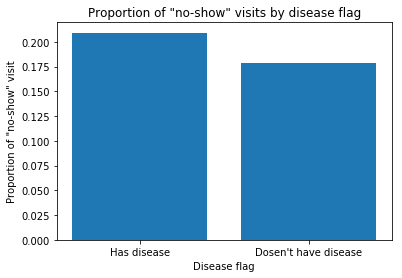

In [70]:
# no-show data subset
df_edt_no_show_2 = df_edt.query('No_show== "Yes"')

# graph labels
labels_2 = ["Has disease", "Dosen't have disease"]

# totals for each group
total_0 = df_edt[df_edt["Has_disease"]==0]["AppointmentID"].count()
total_1 = df_edt[df_edt["Has_disease"]==1]["AppointmentID"].count()

# no-show visits for each group
no_show_0 = df_edt_no_show_2[df_edt_no_show_2["Has_disease"]==0]["AppointmentID"].count()
no_show_1 = df_edt_no_show_2[df_edt_no_show_2["Has_disease"]==1]["AppointmentID"].count()

# bars locations
locations_2 = [1,2]
# bars highs
highs =  [float(no_show_0/total_0), float(no_show_1/total_1)]

# drawing graph
plt.bar(locations_2, highs, tick_label = labels_2)
# graph title and labels
plt.title('Proportion of "no-show" visits by disease flag')
plt.xlabel('Disease flag')
plt.ylabel('Proportion of "no-show" visit');

As we can see, patient with any disease is more likely to omit appointment.

We will check hypothesis with statistical test.

###### H0: There is no relationship between variables  "Has_disease" and "No_show"
###### H1: There is a relationship between variables  "Has_disease" and "No_show"

In [73]:
# examples of data
df_edt[["Has_disease","No_show"]].sort_values(by="Has_disease", ascending=False).head(10)

,Has_disease,No_show
0,1,No
85284,1,No
85374,1,Yes
33087,1,No
85373,1,Yes
85372,1,No
85371,1,No
85368,1,No
85367,1,No
33098,1,Yes


Creating crosstab.

In [74]:
# crosstab with two columns
crosstab = pd.crosstab(df_edt["Has_disease"], df_edt["No_show"])

crosstab

No_show,No,Yes
Has_disease,,
0,66511,17603
1,21696,4716


Calculating chi2 test with chi2_contingency package

In [76]:
# calculating chi2 test
chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)

# chi2 test results
print({chi2}, {p_value}, {dof})

{117.51780754951909} {2.2110598034205433e-27} {1}


Checking chi2 result with critical value in the distribution table

In distribution table for level of significance p=0.05 and degrees of freedom dof = 1 we can find critical value for chi2 test equal 3,841.

In [79]:
# critical value for chi2 test (p=0.05, df=1)
critical_value = 3.841

# checking critical value
test_chi_result = (chi2>critical_value)

print("Chi2 is greater then critical value: %s" %test_chi_result)

Chi2 is greater then critical value: True


Chi2 is greater then critical value so we can reject hypothesis H0.

It means that where is relation between variables 'Has_disease' and 'No-show'.

This test is statistical significant

<a id='conclusions'></a>
## Conclusions

In this project we have analyze some piece of data about 'No-show' visits in Brazilian hospitals. Our data sample consists of 110527 rows. 
We have prepare data for further investigation by adding new columns "Age_group" and "Has_diease".

In the first question we wanted to show locations that have the biggest number of 'No-show' visits. It looks like, that the pioneer on it is 'JARDIM CAMBURI' location  with more then 1400 ommited visits.
This analysis could be expanded to proportion as well. 

In our data set all 'No-show' visits has more then 20% so it is a big issue to resolve, to find out what features are responsible for that.


The second question was about patient characteristics. 

We have drawn relation between "Age_group" and 'No_show' visits on bar chart. It seems that middle-age group (40-69) have bigger proportion of 'No-show' visits. But this relation wasn't tested statisticaly, so this information is tentative.

On 'Proportion of "no-show" visits by disease flag' graph we can see relation between "No_show" visits and any disease presented as flag 'Has_disease'.

This part was tested statisticaly with chi2 test. Chi2 value was greater than critical value from distribution tabel, that means test is significant.

<a id='limitations'></a>
## Limitations

Analysis shown in this project is based on data including only half of the year. Minimum and maximum value for scheduleDay is equal '2015-11-10' and  '2016-06-08'. In my opinion it is not enought range to use it in predictive models, because this data could be time relative.  It is better to base predictive models on the wider range of the data and analyze whole year.

It is important to notice that only last part of analysis was tested statisticaly. Rest of the results are tentative.